# Day 4: Correlation and Dependence
## Week 2: Statistics & Probability for Finance

---

**Learning Objectives:**
- Distinguish Pearson, Spearman, and Kendall correlations
- Understand correlation vs causation in finance
- Analyze rolling correlation for regime detection
- Build correlation matrices for portfolio analysis

In [1]:
# Day 4 Setup: Correlation and Dependence
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

# Load market data
df = pd.read_csv('../datasets/raw_data/combined_adjusted_close.csv', 
                 index_col='Date', parse_dates=True)
assets = ['AAPL', 'MSFT', 'GOOGL', 'SPY', 'JPM', 'GLD', 'TLT']
prices = df[assets].dropna()
returns = prices.pct_change().dropna()

print("=" * 60)
print("CORRELATION AND DEPENDENCE - DAY 4")
print("=" * 60)

CORRELATION AND DEPENDENCE - DAY 4


## 1. Types of Correlation

| Type | What it Measures | When to Use |
|------|------------------|-------------|
| **Pearson** | Linear relationship | Normal data, linear relations |
| **Spearman** | Monotonic relationship | Ordinal data, non-linear |
| **Kendall** | Concordance | Small samples, robust |

COMPARING CORRELATION MEASURES

AAPL vs SPY Correlations:
Measure         Correlation     p-value        
---------------------------------------------
Pearson         0.7770          0.00e+00       
Spearman        0.7012          4.12e-262      
Kendall         0.5269          5.73e-242      


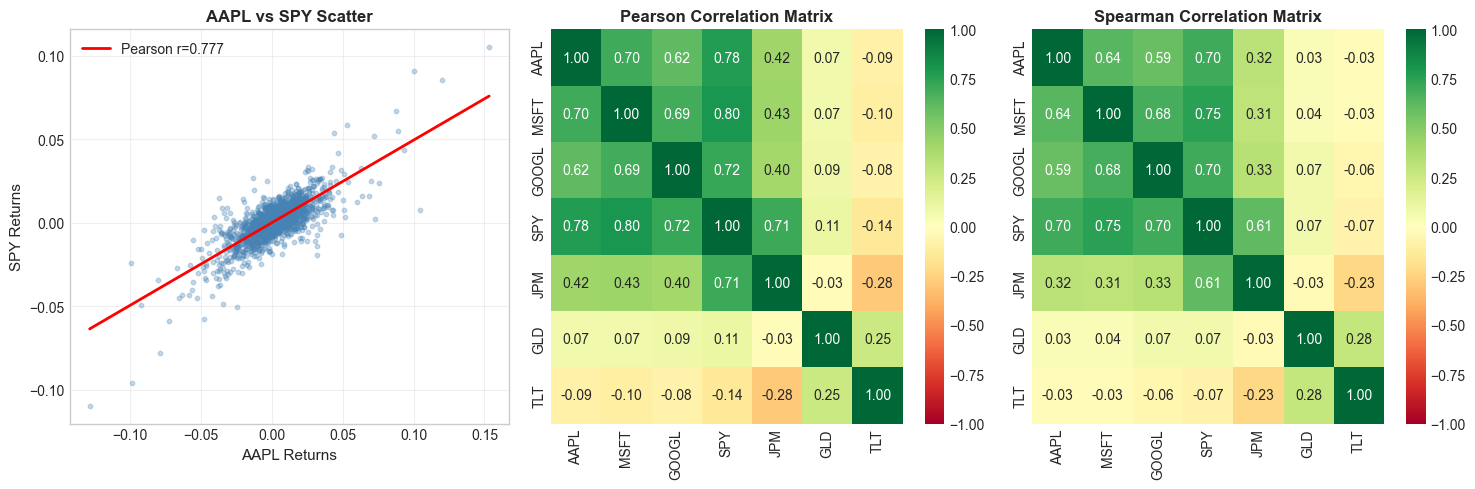

In [2]:
# Compare correlation types
print("=" * 60)
print("COMPARING CORRELATION MEASURES")
print("=" * 60)

# Calculate all three correlation types
aapl = returns['AAPL'].values
spy = returns['SPY'].values

pearson_r, pearson_p = stats.pearsonr(aapl, spy)
spearman_r, spearman_p = stats.spearmanr(aapl, spy)
kendall_r, kendall_p = stats.kendalltau(aapl, spy)

print(f"\nAAPL vs SPY Correlations:")
print(f"{'Measure':<15} {'Correlation':<15} {'p-value':<15}")
print("-" * 45)
print(f"{'Pearson':<15} {pearson_r:<15.4f} {pearson_p:<15.2e}")
print(f"{'Spearman':<15} {spearman_r:<15.4f} {spearman_p:<15.2e}")
print(f"{'Kendall':<15} {kendall_r:<15.4f} {kendall_p:<15.2e}")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot
axes[0].scatter(aapl, spy, alpha=0.3, s=10, c='steelblue')
z = np.polyfit(aapl, spy, 1)
p = np.poly1d(z)
axes[0].plot(sorted(aapl), p(sorted(aapl)), 'r-', lw=2, label=f'Pearson r={pearson_r:.3f}')
axes[0].set_xlabel('AAPL Returns', fontsize=11)
axes[0].set_ylabel('SPY Returns', fontsize=11)
axes[0].set_title('AAPL vs SPY Scatter', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Correlation matrix heatmap
corr_matrix = returns.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            ax=axes[1], vmin=-1, vmax=1)
axes[1].set_title('Pearson Correlation Matrix', fontsize=12, fontweight='bold')

# Spearman correlation matrix
spearman_matrix = returns.corr(method='spearman')
sns.heatmap(spearman_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            ax=axes[2], vmin=-1, vmax=1)
axes[2].set_title('Spearman Correlation Matrix', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 2. Rolling Correlation - Regime Detection

ROLLING CORRELATION ANALYSIS


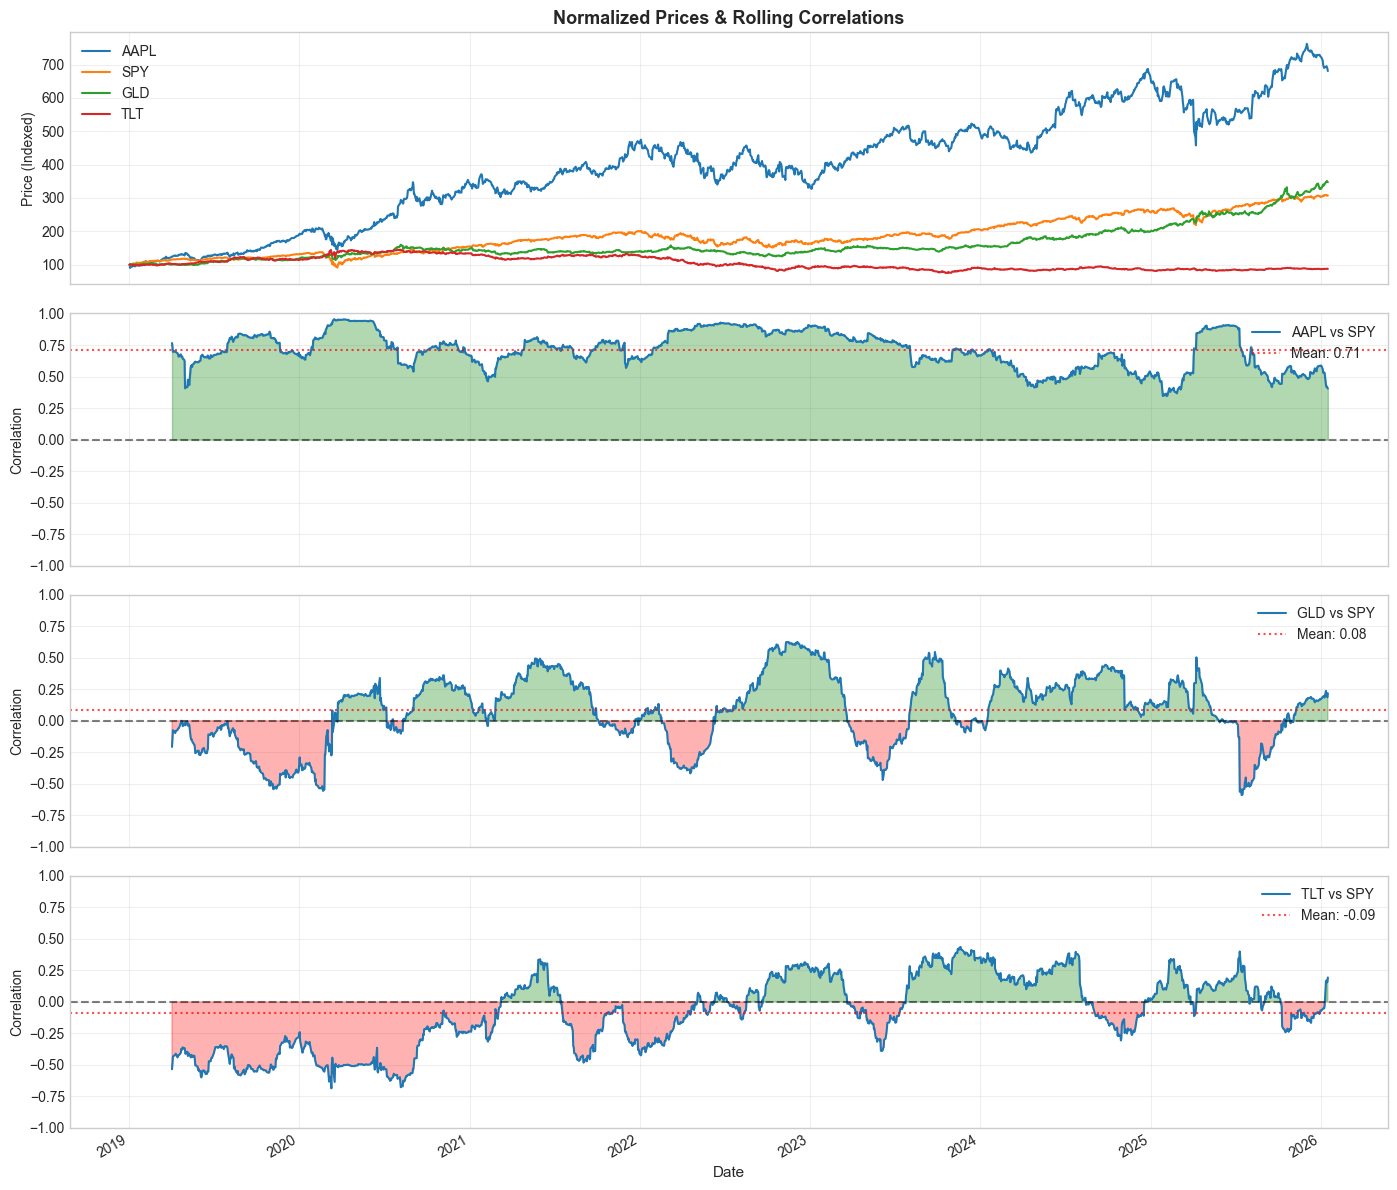


📊 Key Observations:
   - Stock-Stock correlations tend to be positive and stable
   - Stock-Bond correlations can flip (risk-on vs risk-off)
   - Correlations spike during crises (contagion effect)


In [3]:
# Rolling Correlation Analysis
print("=" * 60)
print("ROLLING CORRELATION ANALYSIS")
print("=" * 60)

window = 63  # ~3 months

# Calculate rolling correlations
pairs = [('AAPL', 'SPY'), ('GLD', 'SPY'), ('TLT', 'SPY')]

fig, axes = plt.subplots(len(pairs) + 1, 1, figsize=(14, 12), sharex=True)

# Price chart
(prices / prices.iloc[0] * 100)[['AAPL', 'SPY', 'GLD', 'TLT']].plot(ax=axes[0], lw=1.5)
axes[0].set_ylabel('Price (Indexed)', fontsize=10)
axes[0].set_title('Normalized Prices & Rolling Correlations', fontsize=13, fontweight='bold')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

for i, (asset1, asset2) in enumerate(pairs):
    rolling_corr = returns[asset1].rolling(window).corr(returns[asset2])
    rolling_corr.plot(ax=axes[i+1], lw=1.5, label=f'{asset1} vs {asset2}')
    axes[i+1].axhline(0, color='black', linestyle='--', alpha=0.5)
    axes[i+1].axhline(rolling_corr.mean(), color='red', linestyle=':', alpha=0.7, 
                      label=f'Mean: {rolling_corr.mean():.2f}')
    axes[i+1].fill_between(rolling_corr.index, 0, rolling_corr, 
                           where=rolling_corr > 0, color='green', alpha=0.3)
    axes[i+1].fill_between(rolling_corr.index, 0, rolling_corr, 
                           where=rolling_corr < 0, color='red', alpha=0.3)
    axes[i+1].set_ylabel('Correlation', fontsize=10)
    axes[i+1].set_ylim(-1, 1)
    axes[i+1].legend(loc='upper right')
    axes[i+1].grid(True, alpha=0.3)

axes[-1].set_xlabel('Date', fontsize=11)
plt.tight_layout()
plt.show()

print("\n📊 Key Observations:")
print("   - Stock-Stock correlations tend to be positive and stable")
print("   - Stock-Bond correlations can flip (risk-on vs risk-off)")
print("   - Correlations spike during crises (contagion effect)")

## 3. Correlation ≠ Causation

CORRELATION ≠ CAUSATION

Two independent random walks:
  Correlation of LEVELS:  0.686 ← SPURIOUS!
  Correlation of CHANGES: -0.077 ← True relationship


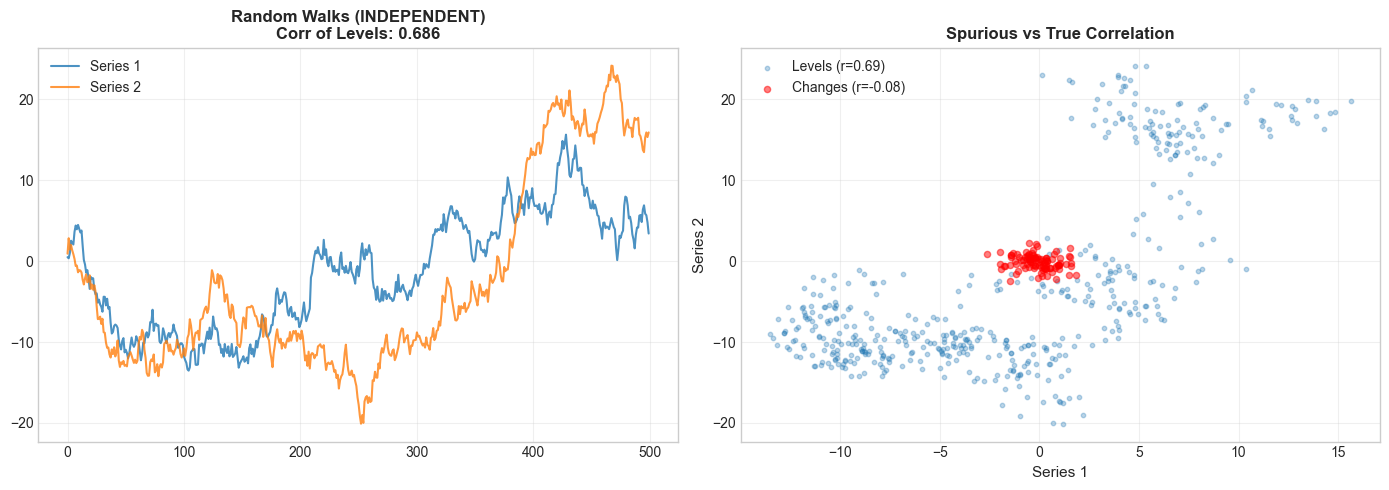


⚠️ LESSON: Always correlate RETURNS, not prices!
   Prices are non-stationary → spurious correlations


In [4]:
# Spurious Correlations Demo
print("=" * 60)
print("CORRELATION ≠ CAUSATION")
print("=" * 60)

np.random.seed(42)

# Generate truly independent random walks
n = 500
random_walk_1 = np.cumsum(np.random.randn(n))
random_walk_2 = np.cumsum(np.random.randn(n))

# Correlation of LEVELS (spurious!)
corr_levels, _ = stats.pearsonr(random_walk_1, random_walk_2)

# Correlation of CHANGES (true relationship)
changes_1 = np.diff(random_walk_1)
changes_2 = np.diff(random_walk_2)
corr_changes, _ = stats.pearsonr(changes_1, changes_2)

print(f"\nTwo independent random walks:")
print(f"  Correlation of LEVELS:  {corr_levels:.3f} ← SPURIOUS!")
print(f"  Correlation of CHANGES: {corr_changes:.3f} ← True relationship")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Levels
axes[0].plot(random_walk_1, label='Series 1', alpha=0.8)
axes[0].plot(random_walk_2, label='Series 2', alpha=0.8)
axes[0].set_title(f'Random Walks (INDEPENDENT)\nCorr of Levels: {corr_levels:.3f}', 
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scatter of levels vs changes
axes[1].scatter(random_walk_1, random_walk_2, alpha=0.3, s=10, label=f'Levels (r={corr_levels:.2f})')
axes[1].scatter(changes_1[:100], changes_2[:100], alpha=0.5, s=20, c='red', 
                label=f'Changes (r={corr_changes:.2f})')
axes[1].set_xlabel('Series 1', fontsize=11)
axes[1].set_ylabel('Series 2', fontsize=11)
axes[1].set_title('Spurious vs True Correlation', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⚠️ LESSON: Always correlate RETURNS, not prices!")
print("   Prices are non-stationary → spurious correlations")

## 4. Tail Dependence - What Correlation Misses

TAIL DEPENDENCE: What Correlation Misses

AAPL vs MSFT Correlation by Regime:
  Overall:         0.699
  Crash days:      0.319  (243 days)
  Rally days:      0.281  (294 days)
  Normal days:     0.458  (1239 days)


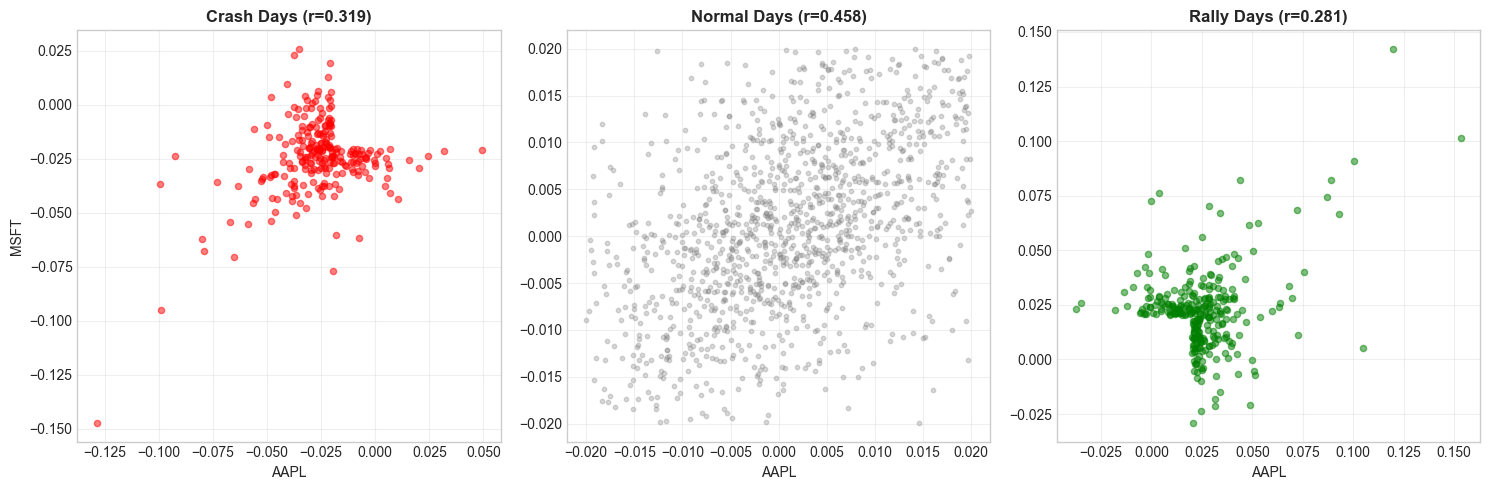


📊 Key Insight: Correlations INCREASE during crises!
   Diversification fails when you need it most.


In [5]:
# Tail Dependence Analysis
print("=" * 60)
print("TAIL DEPENDENCE: What Correlation Misses")
print("=" * 60)

# Overall correlation
aapl_ret = returns['AAPL']
msft_ret = returns['MSFT']
full_corr = aapl_ret.corr(msft_ret)

# Conditional correlations
threshold = 0.02  # 2% move

# Bad days (crashes)
bad_days = (aapl_ret < -threshold) | (msft_ret < -threshold)
corr_bad = aapl_ret[bad_days].corr(msft_ret[bad_days])

# Good days (rallies)
good_days = (aapl_ret > threshold) | (msft_ret > threshold)
corr_good = aapl_ret[good_days].corr(msft_ret[good_days])

# Normal days
normal_days = ~bad_days & ~good_days
corr_normal = aapl_ret[normal_days].corr(msft_ret[normal_days])

print(f"\nAAPL vs MSFT Correlation by Regime:")
print(f"  Overall:         {full_corr:.3f}")
print(f"  Crash days:      {corr_bad:.3f}  ({bad_days.sum()} days)")
print(f"  Rally days:      {corr_good:.3f}  ({good_days.sum()} days)")
print(f"  Normal days:     {corr_normal:.3f}  ({normal_days.sum()} days)")

# Visualize conditional correlations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(aapl_ret[bad_days], msft_ret[bad_days], alpha=0.5, c='red', s=20)
axes[0].set_title(f'Crash Days (r={corr_bad:.3f})', fontsize=12, fontweight='bold')
axes[0].set_xlabel('AAPL', fontsize=10)
axes[0].set_ylabel('MSFT', fontsize=10)
axes[0].grid(True, alpha=0.3)

axes[1].scatter(aapl_ret[normal_days], msft_ret[normal_days], alpha=0.3, c='gray', s=10)
axes[1].set_title(f'Normal Days (r={corr_normal:.3f})', fontsize=12, fontweight='bold')
axes[1].set_xlabel('AAPL', fontsize=10)
axes[1].grid(True, alpha=0.3)

axes[2].scatter(aapl_ret[good_days], msft_ret[good_days], alpha=0.5, c='green', s=20)
axes[2].set_title(f'Rally Days (r={corr_good:.3f})', fontsize=12, fontweight='bold')
axes[2].set_xlabel('AAPL', fontsize=10)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Key Insight: Correlations INCREASE during crises!")
print("   Diversification fails when you need it most.")

## 📝 Key Takeaways - Day 4

### Correlation Types:
1. **Pearson**: Linear relationships, assumes normality
2. **Spearman**: Rank-based, robust to outliers
3. **Kendall**: Concordance, good for small samples

### Critical Concepts:
- Always correlate **returns**, not prices
- Correlations are **time-varying** (use rolling windows)
- Correlations **increase during crises** (tail dependence)
- High correlation ≠ causation

### Interview Questions:
- "Why shouldn't you correlate price levels?"
- "How does correlation change during market stress?"
- "What is tail dependence and why does it matter?"
- "When would you use Spearman over Pearson?"